In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
__author__ = 'Author'
__email__ = 'Email'

# Share Plots - Line Charts

This notebook serves as a helpful guide for generating visually appealing figures using popular Python plotting libraries. Whether you're a researcher, data scientist, or student, well-crafted bar charts are essential for presenting data in a clear and impactful manner. In this notebook, you will find easy-to-follow code examples and step-by-step instructions to create various types of charts, including:
1. Line chart
2. Line charts with variances
3. Grouped line charts with variances
4. Dual Axis Line Chart

## Initialization

In [2]:
# built-in
import os
# public
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})
colors = [plt.cm.Paired(i) for i in range(20)]
# private
from src import utils

%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

---
## 1. Line chart

In [3]:
# init
data_path = os.path.join('res', 'line', '1.pkl')
data_dict = utils.load_pickle(data_path)
# number of methods
n_methods = range(0, len(data_dict['methods']))

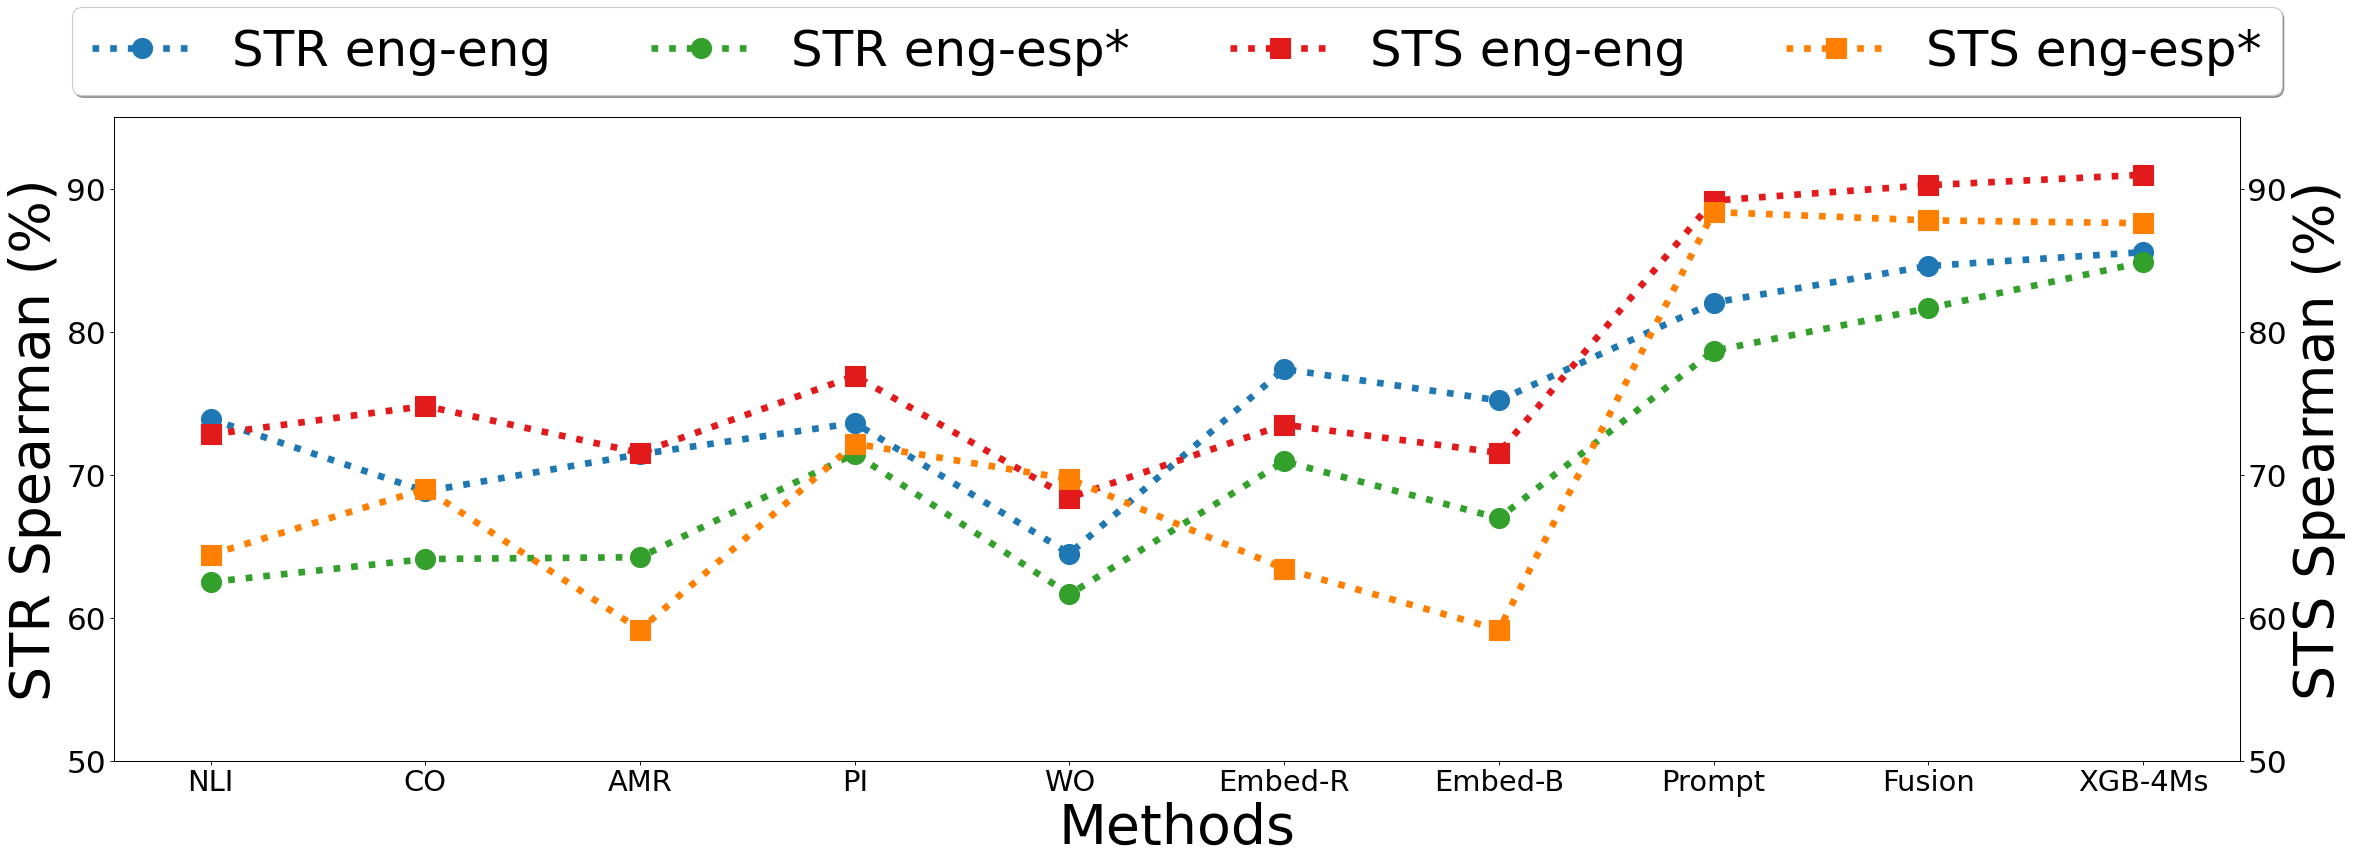

In [4]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(30, 10), dpi=80)
ax1.plot(
    data_dict['str_en_en']
    , color=colors[1]
    , marker = 'o'
    , markersize=18
    , linewidth='6'
    , linestyle='dotted'
    , label='STR eng-eng'
)

ax1.plot(
    data_dict['str_en_esp']
    , color=colors[3]
    , marker = 'o'
    , markersize=18
    , linewidth='6'
    , linestyle='dotted'
    , label='STR eng-esp*'
)

ax1.set_yticks([50, 60, 70, 80, 90])
ax1.set_yticklabels([50, 60, 70, 80, 90], fontsize=28)
ax1.set_ylim(50, 95)
ax1.set_ylabel('STR Spearman (%)', fontsize=50)
ax1.set_xlabel('Methods', fontsize=50)
ax1.tick_params(axis='y')

# Creating a second y-axis
ax2 = ax1.twinx()

ax2.plot(
    data_dict['sts_en_en']
    , color=colors[5]
    , marker = 's'
    , markersize=18
    , linewidth='6'
    , linestyle='dotted'
    , label='STS eng-eng'
)

ax2.plot(
    data_dict['sts_en_esp']
    , color=colors[7]
    , marker = 's'
    , markersize=18
    , linewidth='6'
    , linestyle='dotted'
    , label='STS eng-esp*'
)

ax2.set_yticks([50, 60, 70, 80, 90])
ax2.set_yticklabels([50, 60, 70, 80, 90], fontsize=28)
ax2.set_ylim(50, 95)
ax2.set_ylabel('STS Spearman (%)', fontsize=50)
ax2.tick_params(axis='y')

ax2.set_xticks(range(10))
ax2.set_xticklabels(data_dict['methods'], fontsize=50)

# Adding a legend and showing the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=4, fancybox=True, shadow=True, fontsize=45)
fig.tight_layout()
plt.show()

---
## 2. Line chart with variances

In [5]:
# init
data_path = os.path.join('res', 'line', '2.pkl')
data_dict = utils.load_pickle(data_path)

ori_quora_ibleu_list = data_dict['ori_quora_ibleu_list']
ori_quora_ibleu_std_list = data_dict['ori_quora_ibleu_std_list']
ori_quora_bleu_list = data_dict['ori_quora_bleu_list']
ori_quora_bleu_std_list = data_dict['ori_quora_bleu_std_list']
sep_quora_ibleu_list = data_dict['sep_quora_ibleu_list']
sep_quora_bleu_list = data_dict['sep_quora_bleu_list']
twitter_ibleu_list = data_dict['twitter_ibleu_list']
twitter_bleu_list = data_dict['twitter_bleu_list']

label_list = ['9/1', '8/2', '7/3', '6/4', '5/5', '4/6', '3/7', '2/8', '1/9']

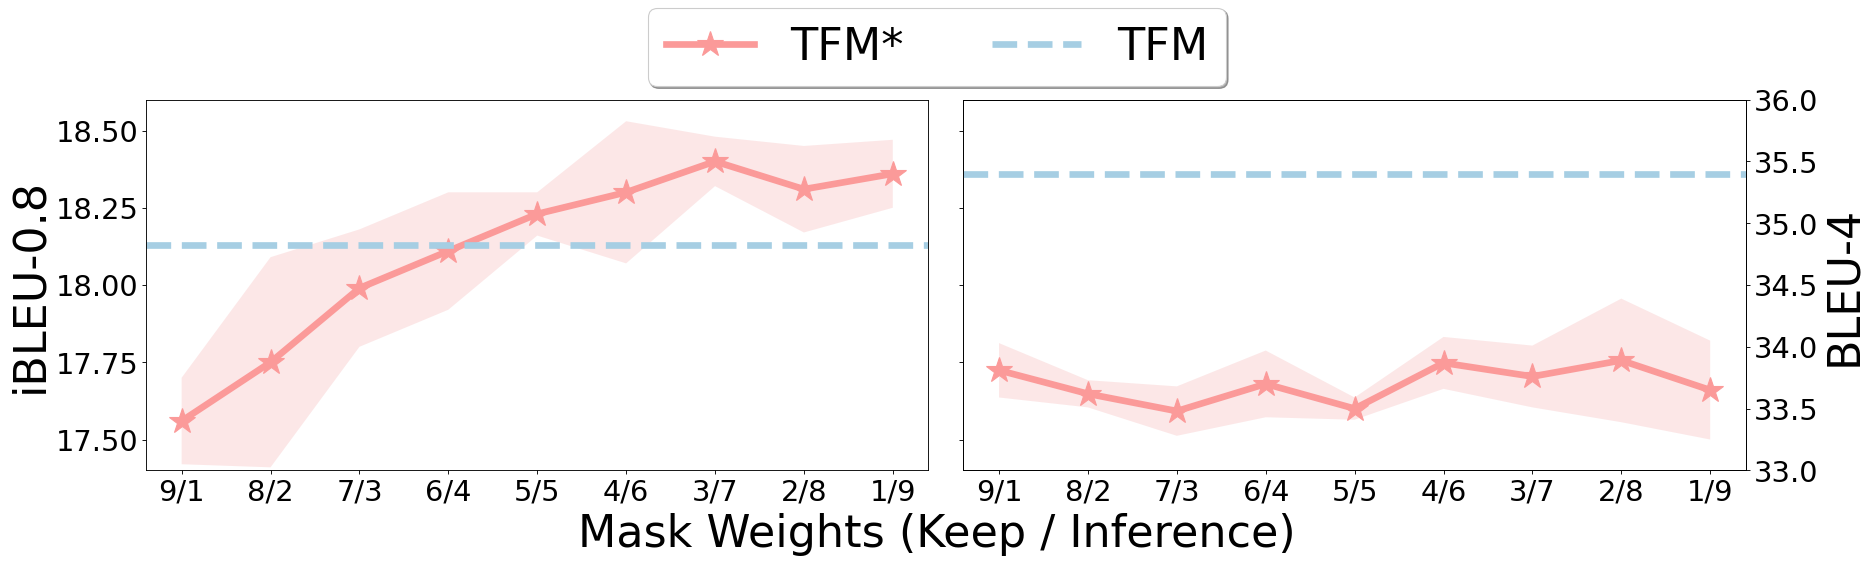

In [6]:
fig, (ax_left, ax_right) = plt.subplots(1, 2, sharey=True, figsize=(24, 6), dpi=80)
colors = [plt.cm.Paired(i) for i in range(20)]

ax_left.plot(
    ori_quora_ibleu_list
    , marker='*'
    , label='TFM*'
    , markersize=24
    , color=colors[4]
    , linewidth='6'
)

ax_left.fill_between(
    range(len(ori_quora_ibleu_list))
    , np.array(ori_quora_ibleu_list)-np.array(ori_quora_ibleu_std_list)
    , np.array(ori_quora_ibleu_list)+np.array(ori_quora_ibleu_std_list)
    ,alpha=0.1
    , facecolor=colors[5]
)


ax_left.axhline(
    y=18.13
    , color=colors[0]
    , linestyle='dashed'
    , linewidth='6'
    , label='TFM'
)

ax_left.set_ylim([17.4, 18.6])
ax_left.set_xticks(range(len(label_list)))
ax_left.set_xticklabels(label_list)
ax_left.set_ylabel('iBLEU-0.8', fontsize=40)

ax1_right = ax_right.twinx()
ax1_right.plot(
    ori_quora_bleu_list
    , marker='*'
    , markersize=24
    , color=colors[4]
    , linewidth='6'
)

ax1_right.fill_between(
    range(len(ori_quora_bleu_list))
    , np.array(ori_quora_bleu_list)-np.array(ori_quora_bleu_std_list)
    , np.array(ori_quora_bleu_list)+np.array(ori_quora_bleu_std_list)
    ,alpha=0.1
    , facecolor=colors[5]
)

ax1_right.axhline(
    y=35.40
    , color=colors[0]
    , linestyle='dashed'
    , linewidth='6'
)

ax1_right.set_ylim([33, 36])
ax1_right.set_xticks(range(len(label_list)))
ax1_right.set_xticklabels(label_list, fontsize=26)
ax1_right.set_ylabel('BLEU-4', fontsize=40)

# Adding a legend and showing the plot
handles, labels = [(a+b) for a, b in zip(ax_left.get_legend_handles_labels(), ax1_right.get_legend_handles_labels())]
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True, fontsize=40)
fig.text(0.5, -0.02, 'Mask Weights (Keep / Inference)', ha='center', fontsize=40)
plt.tight_layout()
plt.show()

---
## 3. Grouped line chart with variances

In [7]:
# init
data_path = os.path.join('res', 'line', '3.pkl')
data_dict = utils.load_pickle(data_path)

coinco_gpt2_p1 = data_dict['coinco_gpt2_p1']
coinco_gpt2_mins = data_dict['coinco_gpt2_mins']
coinco_gpt2_maxs = data_dict['coinco_gpt2_maxs']

coinco_gpt2m_p1 = data_dict['coinco_gpt2m_p1']
coinco_gpt2m_mins = data_dict['coinco_gpt2m_mins']
coinco_gpt2m_maxs = data_dict['coinco_gpt2m_maxs']

coinco_gpt2l_p1 = data_dict['coinco_gpt2l_p1']
coinco_gpt2l_mins = data_dict['coinco_gpt2l_mins']
coinco_gpt2l_maxs = data_dict['coinco_gpt2l_maxs']

swords_gpt2_p1 = data_dict['swords_gpt2_p1']
swords_gpt2_mins = data_dict['swords_gpt2_mins']
swords_gpt2_maxs = data_dict['swords_gpt2_maxs']

swords_gpt2m_p1 = data_dict['swords_gpt2m_p1']
swords_gpt2m_mins = data_dict['swords_gpt2m_mins']
swords_gpt2m_maxs = data_dict['swords_gpt2m_maxs']

swords_gpt2l_p1 = data_dict['swords_gpt2l_p1']
swords_gpt2l_mins = data_dict['swords_gpt2l_mins']
swords_gpt2l_maxs = data_dict['swords_gpt2l_maxs']

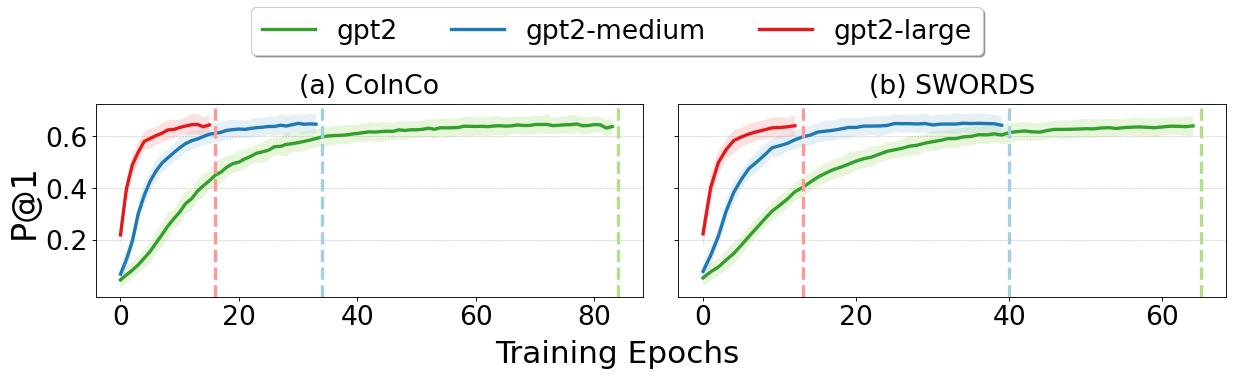

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 4), dpi=80)
# coinco
axs[0].plot(
    coinco_gpt2_p1[:np.argmax(coinco_gpt2_p1)]
    , label='gpt2'
    , color=colors[3]
    , linewidth='3'
)
axs[0].fill_between(
    range(np.argmax(coinco_gpt2_p1))
    , np.array(coinco_gpt2_mins[:np.argmax(coinco_gpt2_p1)]) - 0.03
    , np.array(coinco_gpt2_maxs[:np.argmax(coinco_gpt2_p1)]) + 0.03
    ,alpha=0.3
    , facecolor=colors[2]
)

axs[0].axvline(
    x=np.argmax(coinco_gpt2_p1)
    , color=colors[2]
    , linestyle='dashed'
    , linewidth='3'
)

axs[0].plot(
    coinco_gpt2m_p1[:np.argmax(coinco_gpt2m_p1)]
    , label='gpt2-medium'
    , color=colors[1]
    , linewidth='3'
)

axs[0].fill_between(
    range(np.argmax(coinco_gpt2m_p1))
    , np.array(coinco_gpt2m_mins)[:np.argmax(coinco_gpt2m_p1)] - 0.03
    , np.array(coinco_gpt2m_maxs)[:np.argmax(coinco_gpt2m_p1)] + 0.03
    ,alpha=0.3
    , facecolor=colors[0]
)

axs[0].axvline(
    x=np.argmax(coinco_gpt2m_p1)
    , color=colors[0]
    , linestyle='dashed'
    , linewidth='3'
)

axs[0].plot(
    coinco_gpt2l_p1[:np.argmax(coinco_gpt2l_p1)]
    , label='gpt2-large'
    , color=colors[5]
    , linewidth='3'
)
axs[0].fill_between(
    range(np.argmax(coinco_gpt2l_p1))
    , np.array(coinco_gpt2l_mins)[:np.argmax(coinco_gpt2l_p1)] - 0.03
    , np.array(coinco_gpt2l_maxs)[:np.argmax(coinco_gpt2l_p1)] + 0.03
    ,alpha=0.3
    , facecolor=colors[4]
)

axs[0].axvline(
    x=np.argmax(coinco_gpt2l_p1)
    , color=colors[4]
    , linestyle='dashed'
    , linewidth='3'
)
# swords
axs[1].plot(
    swords_gpt2_p1[:np.argmax(swords_gpt2_p1)]
    # , label='gpt2'
    , color=colors[3]
    , linewidth='3'
)
axs[1].fill_between(
    range(np.argmax(swords_gpt2_p1))
    , np.array(swords_gpt2_mins)[:np.argmax(swords_gpt2_p1)] - 0.03
    , np.array(swords_gpt2_maxs)[:np.argmax(swords_gpt2_p1)] + 0.03
    ,alpha=0.3
    , facecolor=colors[2]
)

axs[1].axvline(
    x=np.argmax(swords_gpt2_p1)
    , color=colors[2]
    , linestyle='dashed'
    , linewidth='3'
)

axs[1].plot(
    swords_gpt2m_p1[:np.argmax(swords_gpt2m_p1)]
    # , label='gpt2-medium'
    , color=colors[1]
    , linewidth='3'
)

axs[1].fill_between(
    range(np.argmax(swords_gpt2m_p1))
    , np.array(swords_gpt2m_mins)[:np.argmax(swords_gpt2m_p1)] - 0.03
    , np.array(swords_gpt2m_maxs)[:np.argmax(swords_gpt2m_p1)] + 0.03
    ,alpha=0.3
    , facecolor=colors[0]
)

axs[1].axvline(
    x=np.argmax(swords_gpt2m_p1)
    , color=colors[0]
    , linestyle='dashed'
    , linewidth='3'
)

axs[1].plot(
    swords_gpt2l_p1[:np.argmax(swords_gpt2l_p1)]
    , color=colors[5]
    , linewidth='3'
)
axs[1].fill_between(
    range(np.argmax(swords_gpt2l_p1))
    , np.array(swords_gpt2l_mins)[:np.argmax(swords_gpt2l_p1)] - 0.03
    , np.array(swords_gpt2l_maxs)[:np.argmax(swords_gpt2l_p1)] + 0.03
    ,alpha=0.3
    , facecolor=colors[4]
)

axs[1].axvline(
    x=np.argmax(swords_gpt2l_p1)
    , color=colors[4]
    , linestyle='dashed'
    , linewidth='3'
)

axs[0].set_title('(a) CoInCo', pad=10, fontsize=24)
axs[0].set_ylabel('P@1', fontsize=30)
axs[0].set_yticks([0.2, 0.4, 0.6])
axs[0].set_yticklabels([0.2, 0.4, 0.6], fontsize=24)
axs[0].set_xticks([0, 20, 40, 60, 80])
axs[0].set_xticklabels([0, 20, 40, 60, 80], fontsize=24)
axs[0].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

axs[1].set_title('(b) SWORDS', pad=10, fontsize=24)
axs[1].set_yticks([0.2, 0.4, 0.6])
axs[1].set_yticklabels([0.2, 0.4, 0.6], fontsize=24)
axs[1].set_xticks([0, 20, 40, 60])
axs[1].set_xticklabels([0, 20, 40, 60], fontsize=24)
axs[1].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Adding a legend and showing the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True, fontsize=24)
fig.text(0.5, 0., 'Training Epochs', ha='center', fontsize=28)
plt.tight_layout()
plt.show()

---
## 4. Dual axis line chart

In [9]:
# init
data_path = os.path.join('res', 'line', '4.pkl')
data_dict = utils.load_pickle(data_path)

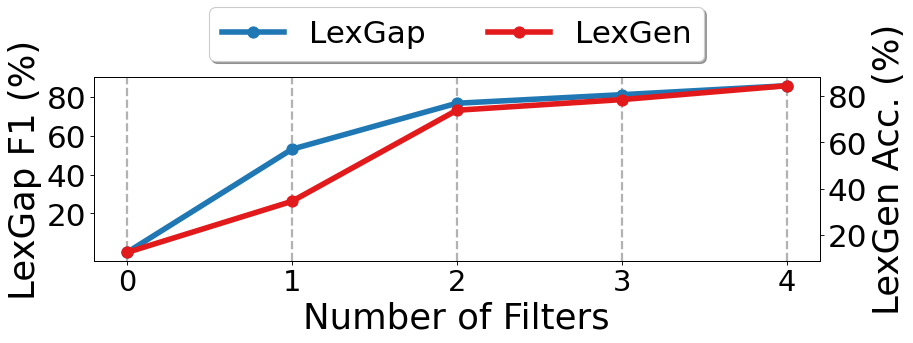

In [10]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12, 4), dpi=80)

ax1.plot(
    data_dict['filters']
    , data_dict['f1_scores']
    , color=colors[1]
    , marker = 'o'
    , markersize=10
    , linewidth='5'
    , label='LexGap'
)
ax1.set_yticks([20, 40, 60, 80])
ax1.set_yticklabels([20, 40, 60, 80], fontsize=28)
ax1.set_xlabel('Number of Filters', fontsize=32)
ax1.set_ylabel('LexGap F1 (%)', fontsize=32)
ax1.tick_params(axis='y')
ax1.xaxis.grid(True, linestyle='--', linewidth=2, color='gray', alpha=0.6)

# Creating a second y-axis for the F1 score
ax2 = ax1.twinx()
ax2.plot(
    data_dict['filters']
    , data_dict['accuracy']
    , color=colors[5]
    , marker = 'o'
    , markersize=10
    , linewidth='5'
    , label='LexGen'
)
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels([0, 1, 2, 3, 4], fontsize=28)
ax2.set_yticks([20, 40, 60, 80])
ax2.set_yticklabels([20, 40, 60, 80], fontsize=28)
ax2.tick_params(axis='y')
ax2.set_ylabel('LexGen Acc. (%)', fontsize=32)

# Adding a legend and showing the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=2, fancybox=True, shadow=True, fontsize=28)
fig.tight_layout()
plt.show()